In [76]:
# Removing row with NaN value in Details column
import pandas as pd

data = pd.read_csv('C:\Degree\Sem 6\CSC650\FYP - Text Classification\Dataset\data1.2.csv')
data_cleaned = data.dropna(subset=['Details'])

# Sort the DataFrame by the 'Place' column
data_cleaned_sorted = data_cleaned.sort_values(by='Place', ascending=True)

# Save the sorted DataFrame to a new CSV file
data_cleaned_sorted.to_csv('data1.3.csv', index=False)

# Display the first 2 rows of the sorted DataFrame
print(data_cleaned_sorted.head(2))

                                Place  \
90   "The Song of Everlasting Sorrow"   
198              25th of April Bridge   

                                               Details         Class  
90   "Song of Everlasting Sorrow" is a historical d...  None Related  
198  On April 25, the bridge spanned both sides of ...  None Related  


# From data1.3.csv
## Clean data using NLTK
#

In [77]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources (run only once)
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to C:\Users\ASUS
[nltk_data]     TUF\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\ASUS
[nltk_data]     TUF\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [78]:
import pandas as pd
data = pd.read_csv('data1.3.csv')

# Function for cleaning text data
def clean_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

    # Causing lots of word missing alphabet
    # Stemming (optional)
    # porter = PorterStemmer()
    # tokens = [porter.stem(word) for word in tokens]

    # Join the tokens back into a string
    cleaned_text = ' '.join(tokens)
    return cleaned_text

In [79]:
# Apply the cleaning function to the 'Details' column
data['Cleaned_Details'] = data['Details'].apply(clean_text)


In [80]:
# Display the updated DataFrame
print(data)

data.to_csv('data1.4.csv')

                                 Place  \
0     "The Song of Everlasting Sorrow"   
1                 25th of April Bridge   
2                 25th of April Bridge   
3                         3D Black Art   
4                             3billion   
...                                ...   
1128                               Zug   
1129                            iRobot   
1130                          old nice   
1131                               Èze   
1132                     Île aux Cerfs   

                                                Details          Class  \
0     "Song of Everlasting Sorrow" is a historical d...   None Related   
1     On April 25, the bridge spanned both sides of ...   None Related   
2     On April 25, the bridge spanned both sides of ...   None Related   
3     Myeongdong 3D Art Museum uses ultra-realistic ...   None Related   
4     Company that offers genetic testing for rare d...  bioinformatic   
...                                                

# From data1.4.csv
## Read Place and Cleaned_details()
#

In [81]:
import pandas as pd

data = pd.read_csv('data1.4.csv')
column_to_read = ['Place', 'Cleaned_Details', 'Class']
selected = data[column_to_read].copy()
selected.rename(columns={'Cleaned_Details': "Details"}, inplace=True)
# selected.to_csv('data1.5.csv', index=False)
print(selected)

                                 Place  \
0     "The Song of Everlasting Sorrow"   
1                 25th of April Bridge   
2                 25th of April Bridge   
3                         3D Black Art   
4                             3billion   
...                                ...   
1128                               Zug   
1129                            iRobot   
1130                          old nice   
1131                               Èze   
1132                     Île aux Cerfs   

                                                Details          Class  
0     song everlasting sorrow historical drama adapt...   None Related  
1     april 25 bridge spanned sides tejo river conne...   None Related  
2     april 25 bridge spanned sides tejo river conne...   None Related  
3     myeongdong 3d art museum uses 3d dislocation p...   None Related  
4     company offers genetic testing rare diseases m...  bioinformatic  
...                                                 ...  

# data1.5.csv
## Tokenize Details
#

In [82]:
import nltk
from nltk.tokenize import word_tokenize

# Sample DataFrame
# data = pd.read_csv('data1.5.csv')
column_to_read = ['Place', 'Details', 'Class']
selected = selected[column_to_read].copy()

# Tokenize the 'Details' column
selected['Tokenized_Details'] = selected['Details'].apply(word_tokenize)

# Display the DataFrame with tokenized details
print(selected[['Place', 'Tokenized_Details','Class']].head(3))

# selected.to_csv('data1.6.csv')


                              Place  \
0  "The Song of Everlasting Sorrow"   
1              25th of April Bridge   
2              25th of April Bridge   

                                   Tokenized_Details         Class  
0  [song, everlasting, sorrow, historical, drama,...  None Related  
1  [april, 25, bridge, spanned, sides, tejo, rive...  None Related  
2  [april, 25, bridge, spanned, sides, tejo, rive...  None Related  


# data1.6.csv
## Read Place and Tokenized_details()
#

In [83]:
column_to_read = ['Place', 'Tokenized_Details', 'Class']
selected = selected[column_to_read].copy()
selected.rename(columns={'Tokenized_Details': "Details"}, inplace=True)
selected.to_csv('data1.7.csv', index=False)
selected.head(3)

,Place,Details,Class
0,"""The Song of Everlasting Sorrow""","[song, everlasting, sorrow, historical, drama,...",None Related
1,25th of April Bridge,"[april, 25, bridge, spanned, sides, tejo, rive...",None Related
2,25th of April Bridge,"[april, 25, bridge, spanned, sides, tejo, rive...",None Related


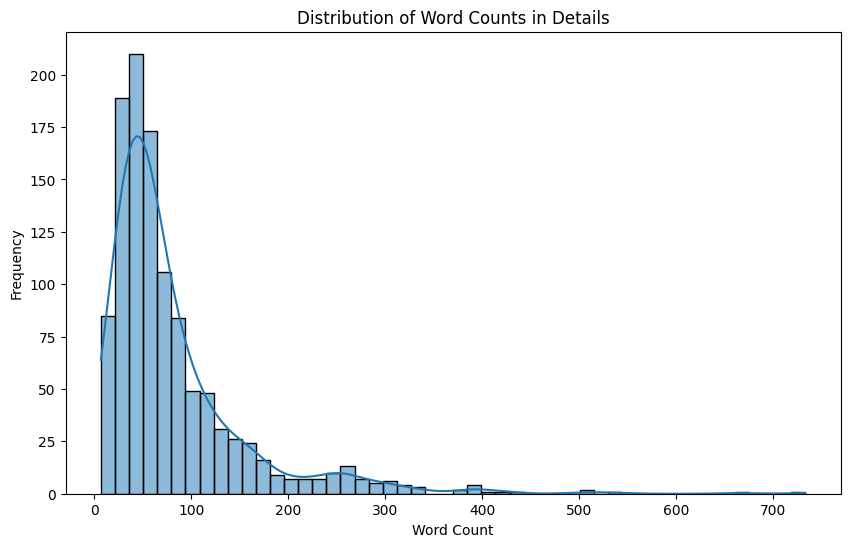

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Details' column contains lists
selected['WordCount'] = selected['Details'].apply(lambda x: len(' '.join(x).split()))

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(selected['WordCount'], bins=50, kde=True)
plt.title('Distribution of Word Counts in Details')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()



In [85]:
import spacy
import pandas as pd
from collections import Counter

# Assuming you have already loaded your data and spaCy model
data = pd.read_csv('data1.7.csv')
nlp = spacy.load("en_core_web_sm")

# Concatenate 'Place' and 'Details' columns
column_to_read = data['Details']

# Apply SpaCy pipeline to each text in the column
docs = column_to_read.apply(nlp)

# Calculate word counts
data['WordCount'] = docs.apply(lambda doc: len(doc))

# Max, Min, and Average Word Counts
max_word_count = data['WordCount'].max()
min_word_count = data['WordCount'].min()
avg_word_count = data['WordCount'].mean()

print(f"Maximum Word Count: {max_word_count}")
print(f"Minimum Word Count: {min_word_count}")
print(f"Average Word Count: {avg_word_count}")

# Most Common Words
all_words = ' '.join(column_to_read).split()
word_counts = Counter(all_words)

# Print most common words
most_common_words = word_counts.most_common(10)
print("Most Common Words:")
for word, count in most_common_words:
    print(f"{word}: {count} times")

# Rank Entity Locations
entity_locations = []
for doc in docs:
    entity_locations.extend([ent.text for ent in doc.ents if ent.label_ == 'GPE'])

ranked_locations = Counter(entity_locations).most_common()
print("Ranked Entity Locations:")
for location, count in ranked_locations:
    print(f"{location}: {count} times")


Maximum Word Count: 2933
Minimum Word Count: 29
Average Word Count: 324.89585172109446
Most Common Words:
'also',: 852 times
'located',: 447 times
'many',: 436 times
'one',: 411 times
'lake',: 386 times
'park',: 383 times
'world',: 361 times
'city',: 357 times
'museum',: 350 times
'island',: 330 times
Ranked Entity Locations:
paris: 100 times
china: 49 times
france: 41 times
rome: 37 times
tokyo: 35 times
italy: 30 times
malaysia: 29 times
japan: 23 times
egypt: 18 times
brazil: 18 times
shanghai: 14 times
venice: 12 times
india: 10 times
cairo: 9 times
germany: 8 times
jakarta: 7 times
wellington: 6 times
morocco: 5 times
london: 5 times
kenya: 4 times
pathai: 3 times
boston: 3 times
navona: 3 times
spain: 2 times
poland: 2 times
colorado: 2 times
guangzhou: 2 times
california: 2 times
berisha: 2 times
cheguri: 2 times
hemophilia: 1 times
virginia: 1 times
denver: 1 times
namibia: 1 times
taiwan: 1 times
lamington: 1 times
pakistan: 1 times
anesthesia: 1 times
singapore: 1 times
neura

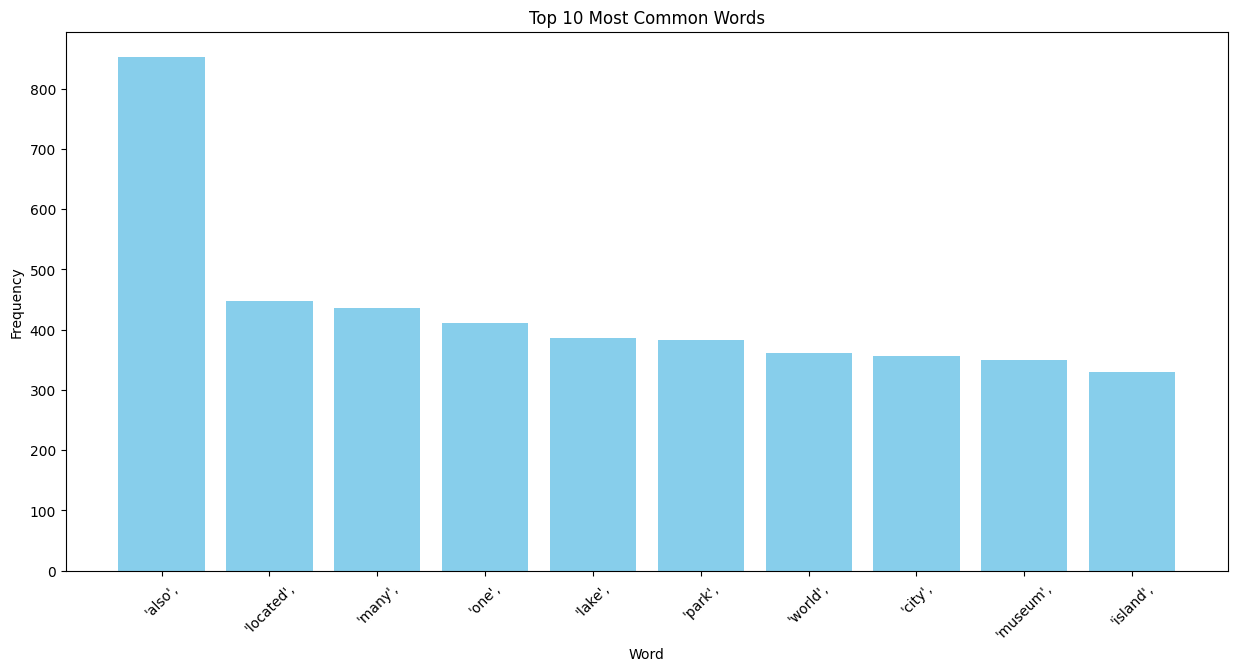

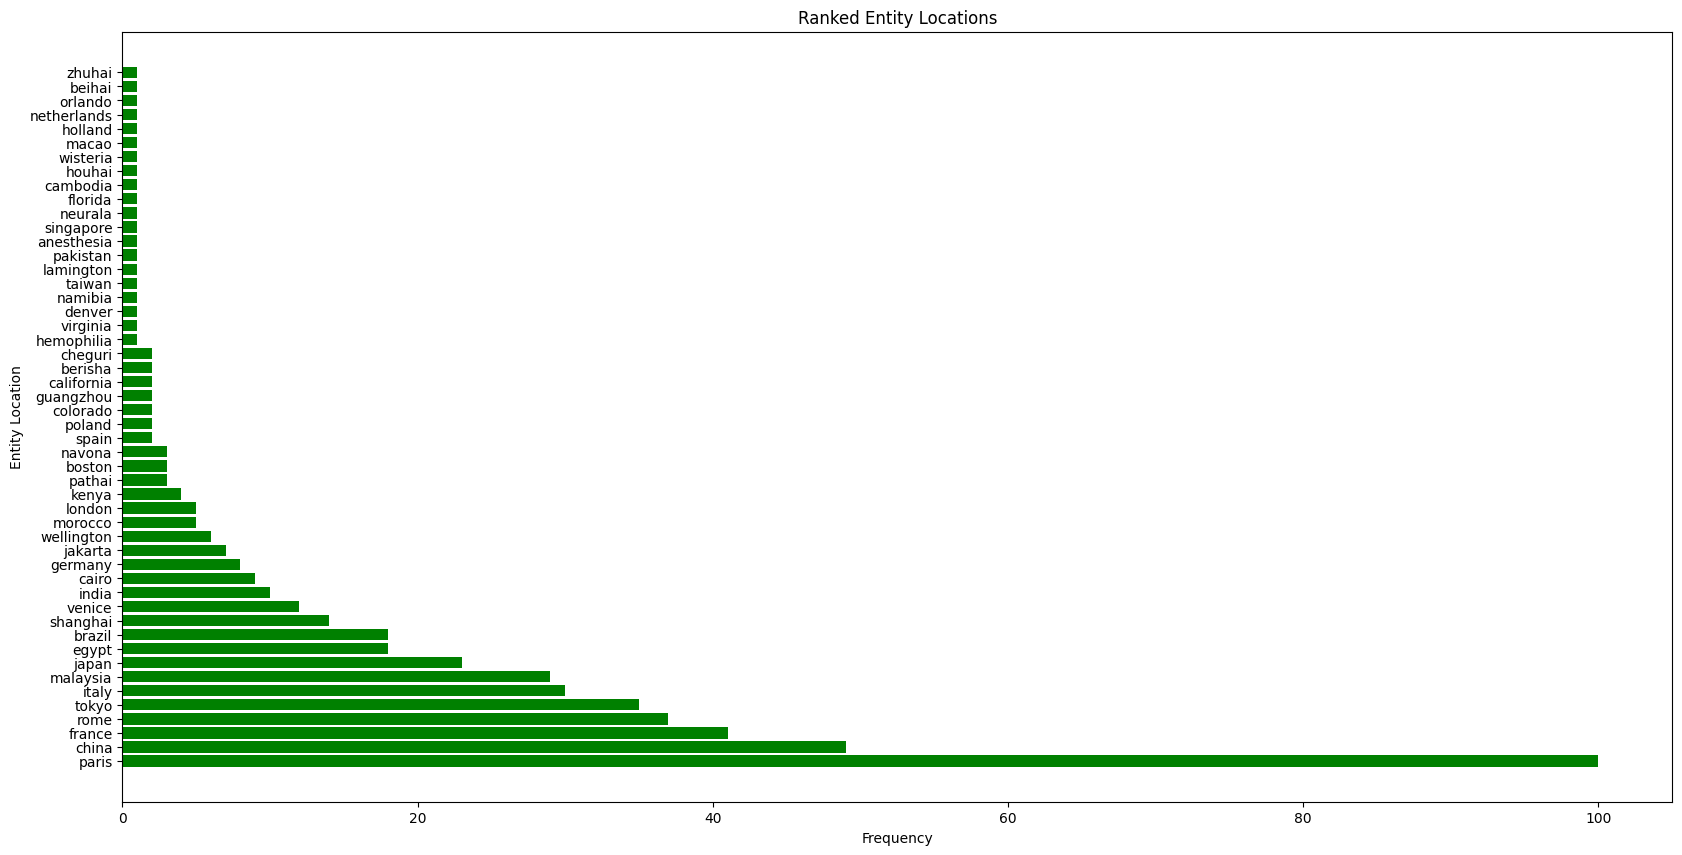

In [86]:
import matplotlib.pyplot as plt
from collections import Counter

# Most Common Words
plt.figure(figsize=(15, 7))
plt.bar(*zip(*most_common_words), color='skyblue')
plt.title('Top 10 Most Common Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Rank Entity Locations
plt.figure(figsize=(20, 10))
locations, counts = zip(*ranked_locations)
plt.barh(locations, counts, color='green')
plt.title('Ranked Entity Locations')
plt.xlabel('Frequency')
plt.ylabel('Entity Location')
plt.show()


In [87]:
# KIV getting Learning to rank algorithm to replace this 
#
#


import pandas as pd
import spacy
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Sample DataFrame
data = pd.read_csv('data1.7.csv')

# Choose a reference word
reference_word = "example"

# Function to calculate similarity between two words
def calculate_similarity(word1, word2):
    return nlp(word1).similarity(nlp(word2))

# Calculate similarity scores for each word in 'Details' with the reference word
data['Similarity'] = data['Details'].apply(lambda details: calculate_similarity(reference_word, details))

# Manually assign ranking labels based on similarity scores (modify as needed)
data['Ranking_Label'] = data['Similarity'].rank(ascending=False)

# Prepare the data for learning-to-rank
X = data[['Similarity']]
y = data['Ranking_Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a learning-to-rank model (Random Forest Regressor in this example)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Rank the words based on the learned model
data['Predicted_Rank'] = model.predict(X)

# Display the resulting DataFrame with similarity, manual rank, and predicted rank
print(data[['Details', 'Similarity', 'Ranking_Label', 'Predicted_Rank']])


C:\Users\ASUS TUF\AppData\Local\Temp\ipykernel_9748\1613244765.py:23: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  return nlp(word1).similarity(nlp(word2))


Mean Squared Error: 1.294163115136812
                                                Details  Similarity  \
0     ['song', 'everlasting', 'sorrow', 'historical'...    0.180436   
1     ['april', '25', 'bridge', 'spanned', 'sides', ...    0.168432   
2     ['april', '25', 'bridge', 'spanned', 'sides', ...    0.168432   
3     ['myeongdong', '3d', 'art', 'museum', 'uses', ...    0.167084   
4     ['company', 'offers', 'genetic', 'testing', 'r...    0.137148   
...                                                 ...         ...   
1128  ['small', 'town', 'zug', 'located', 'zurich', ...    0.175764   
1129  ['irobot', 'uses', 'ai', 'engineering', 'home'...    0.162116   
1130  ['today', 'old', 'town', 'nice', 'still', 'mai...    0.173868   
1131  ['small', 'town', 'eze', 'located', 'nice', 'm...    0.178880   
1132  ['kashima', 'small', 'island', 'eastern', 'coa...    0.179792   

      Ranking_Label  Predicted_Rank  
0             248.0         248.330  
1             766.5         766.7

In [88]:
import pandas as pd
import spacy
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Sample DataFrame
data = pd.read_csv('data1.7.csv')

# Word to compare similarity to
comparison_word = "Paris"

# Calculate similarity scores
data['Similarity'] = data['Details'].apply(lambda details: nlp(details).similarity(nlp(comparison_word)))

# Assign ranking labels
data['Ranking_Label'] = data['Similarity'].rank(ascending=False)

# Prepare data for learning-to-rank
X = data[['Similarity']]
y = data['Ranking_Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a learning-to-rank model (Random Forest Regressor in this example)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict rankings on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Predict rankings for all data
data['Predicted_Rank'] = model.predict(X)

# Sort the DataFrame based on predicted rankings
sorted_data = data.sort_values(by='Predicted_Rank')

# Display the resulting DataFrame
print(sorted_data[['Details', 'Similarity', 'Ranking_Label', 'Predicted_Rank']])


C:\Users\ASUS TUF\AppData\Local\Temp\ipykernel_9748\638442536.py:17: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  data['Similarity'] = data['Details'].apply(lambda details: nlp(details).similarity(nlp(comparison_word)))


Mean Squared Error: 1.219814096916291
                                                Details  Similarity  \
935   ['american', 'biopharmaceutical', 'company', '...    0.105328   
126   ['developing', 'data', 'driven', 'risk', 'pred...    0.099246   
565   ['manufacturer', 'supplier', 'motor', 'systems...    0.088875   
1123  ['hangang', 'citizens', 'park', 'located', 'al...    0.084043   
716   ['palais', 'des', 'nations', 'headquarters', '...    0.083734   
...                                                 ...         ...   
504   ['lake', 'wanaka', 'located', 'otago', 'region...    0.025673   
505   ['lake', 'wanaka', 'located', 'otago', 'region...    0.025673   
108   ['de', 'garde', 'cathedral', 'symbol', 'marsei...    0.025645   
805   ['queenstown', 'gardens', 'located', 'southeas...    0.025492   
571   ['malacca', 'straits', 'mosque', 'located', 'a...    0.024323   

      Ranking_Label  Predicted_Rank  
935             1.0           1.600  
126             2.0           2.0

In [89]:
from spacy import displacy

# Assuming 'docs' is a list of SpaCy Doc objects
for doc in docs:
    displacy.render(doc, style="ent", jupyter=True)


c:\Users\ASUS TUF\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\displacy\__init__.py:213: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


# data1.7.csv
## TF-IDF
# 

In [90]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample DataFrame
data = pd.read_csv('data1.7.csv')
column_to_read = ['Place', 'Details', 'Class']  # Assuming 'Cleaned_Details' is the preprocessed text column
selected = data[column_to_read].copy()

# Create a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')  # You can customize stop words as needed

# Fit and transform the 'Cleaned_Details' column
tfidf_matrix = tfidf_vectorizer.fit_transform(selected['Details'])

# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Concatenate the TF-IDF DataFrame with the original DataFrame
result_df = pd.concat([selected, tfidf_df], axis=1)

# Display the resulting DataFrame
print(result_df.head(3))

                              Place  \
0  "The Song of Everlasting Sorrow"   
1              25th of April Bridge   
2              25th of April Bridge   

                                             Details         Class  007  0115  \
0  ['song', 'everlasting', 'sorrow', 'historical'...  None Related  0.0   0.0   
1  ['april', '25', 'bridge', 'spanned', 'sides', ...  None Related  0.0   0.0   
2  ['april', '25', 'bridge', 'spanned', 'sides', ...  None Related  0.0   0.0   

   095   10  100      1000  1005  ...  zones  zoo  zoological  zoom  zug  zun  \
0  0.0  0.0  0.0  0.108162   0.0  ...    0.0  0.0         0.0   0.0  0.0  0.0   
1  0.0  0.0  0.0  0.000000   0.0  ...    0.0  0.0         0.0   0.0  0.0  0.0   
2  0.0  0.0  0.0  0.000000   0.0  ...    0.0  0.0         0.0   0.0  0.0  0.0   

   zurich  zwingli  zyt  évora  
0     0.0      0.0  0.0    0.0  
1     0.0      0.0  0.0    0.0  
2     0.0      0.0  0.0    0.0  

[3 rows x 11728 columns]


# use result_df
## Naive bayes
# 

In [91]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Sample DataFrame
#column_to_read = ['Place', 'Details', 'Class']  # Assuming 'Label' is your target variable
selected = result_df.copy()


# Split the data into training and testing sets
train_data, test_data = train_test_split(selected, test_size=0.1, random_state=42)

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['Details'])
X_test_tfidf = tfidf_vectorizer.transform(test_data['Details'])

# Create and train a Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tfidf, train_data['Class'])

# Predictions on the test set
predictions = naive_bayes_classifier.predict(X_test_tfidf)

# Evaluate the classifier
accuracy = accuracy_score(test_data['Class'], predictions)
conf_matrix = confusion_matrix(test_data['Class'], predictions)
classification_rep = classification_report(test_data['Class'], predictions)

# Display evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)

# Save the train model to a file
joblib.dump(naive_bayes_classifier, 'model.h5')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')


Accuracy: 0.90

Confusion Matrix:
[[91  0  0  0  0]
 [ 4  0  0  0  0]
 [ 3  0  0  0  0]
 [ 1  0  0  3  0]
 [ 3  0  0  0  9]]

Classification Report:
               precision    recall  f1-score   support

 None Related       0.89      1.00      0.94        91
    aerospace       0.00      0.00      0.00         4
bioinformatic       0.00      0.00      0.00         3
biotechnology       1.00      0.75      0.86         4
      robotic       1.00      0.75      0.86        12

     accuracy                           0.90       114
    macro avg       0.58      0.50      0.53       114
 weighted avg       0.85      0.90      0.87       114



c:\Users\ASUS TUF\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS TUF\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS TUF\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

['tfidf_vectorizer.pkl']

In [92]:
# Load the saved TF-IDF vectorizer
loaded_vectorizer = joblib.load('tfidf_vectorizer.pkl')
# Load the saved Naive Bayes classifier
naive_bayes_classifier = joblib.load('model.h5')


def class_det(Details, vectorizer, classifier):
    input_data = [Details]
    vectorized_input_data = vectorizer.transform(input_data)
    predictions = classifier.predict(vectorized_input_data)
    return predictions
    print(predictions)


In [93]:
result =class_det('Astra makes engines for spacecraft using electric propulsion technology and provides launch services for space missions. Astra reached a key milestone in 2021, succeeding in its first commercial launch to low Earth orbit. The company says its launch systems are designed to be cost efficient with a payload capacity of approximately 600 kg', loaded_vectorizer, naive_bayes_classifier)
print(result)

['None Related']
